# Estimating the Unobserved: A Simulation Study on Censoring and

Truncation in Race Models of Choice and Response Time

Jeroen E. Timmerman [](https://orcid.org/0009-0003-8208-0509) (University of Amsterdam)

This is my abstract.

In [ ]:
library(EMC2)
library(rtdists)
library(stringr)
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: coda

Loading required package: Matrix


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

************
Welcome to BayesFactor 0.9.12-4.7. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


Attaching package: 'BayesFactor'

The following object is masked from 'package:EMC2':

    compare

In [ ]:
parsLBA <- c(log(2),3,1,log(2),log(.75),log(.2))
names(parsLBA) <- c("B", "v", "v_lMd", "A", "sv_lMd", "t0")
parsRDM <- c(log(3),1,.4,log(.75),log(.2))
names(parsRDM) <- c("B", "v", "v_lMd", "s_lMd", "t0")
parsLNR <- c(log(.75),log(.65),log(.5),log(.8),log(.4))
names(parsLNR) <- c("m", "m_lMd", "s", "s_lMd", "t0")

In [ ]:
file_names <- list.files("01_simulation/upper_censoring/EMCs")
EMCs_upper <- data.frame()
for (i in file_names){
  load(paste0("01_simulation/upper_censoring/EMCs/", i))
  EMC <- data.frame(EMC = str_remove(i, ".RData"),
                    censoring = str_detect(i, "sM"),
                    model_name = str_extract(i, "LBA|LNR|RDM"),
                    percentage = str_extract(i, "70|90|975")
                    )
  EMCs_upper <- rbind(EMCs_upper, EMC)
}
EMCs_upper <- na.omit(EMCs_upper) # to remove empty sLBA
EMCs_upper$censoring <- factor(EMCs_upper$censoring, c(FALSE, TRUE), c("Truncated", "Censored"))
EMCs_upper$model_name <- factor(EMCs_upper$model_name)
EMCs_upper$percentage <- factor(EMCs_upper$percentage, c(975, 90, 70), c("2.5%", "10%", "30%"))

In [ ]:
pars_upper <- list()
for (i in 1:nrow(EMCs_upper)) {
  pars_upper[[EMCs_upper$EMC[i]]] <-
    as.data.frame(summary(get(EMCs_upper$EMC[i], envir = globalenv()),
                          selection = "alpha")[[1]])
  EMCs_upper$RMSE[i] <- sqrt(mean((pars_upper[[EMCs_upper$EMC[i]]][,2] - get(paste0("pars", EMCs_upper$model_name[i]), envir = globalenv()))^2))
}


 alpha Jeroen 
         2.5%    50%  97.5%  Rhat  ESS
B       1.660  1.691  1.723 1.000 2379
v       7.343  7.619  7.909 1.000 2431
v_lMd   1.344  1.415  1.492 1.002 2127
A       1.219  1.273  1.326 1.001 2463
sv_lMd -0.590 -0.533 -0.479 1.000 2030
t0     -2.995 -2.977 -2.905 1.000 2194

 alpha Jeroen 
         2.5%    50%  97.5%  Rhat  ESS
B       1.539  1.570  1.602 1.001 2077
v       6.433  6.668  6.924 1.001 2088
v_lMd   1.306  1.367  1.432 1.000 2103
A       1.447  1.496  1.547 1.001 2042
sv_lMd -0.573 -0.523 -0.473 1.001 2188
t0     -2.995 -2.975 -2.894 1.000 2243

 alpha Jeroen 
         2.5%    50%  97.5%  Rhat  ESS
B       1.236  1.302  1.343 1.001 1989
v       4.711  4.928  5.149 1.002 2035
v_lMd   1.100  1.148  1.197 1.001 2569
A       1.216  1.284  1.347 1.001 2117
sv_lMd -0.428 -0.383 -0.338 1.001 2519
t0     -2.990 -2.829 -2.491 1.000 2101

 alpha Jeroen 
        2.5%    50%  97.5%  Rhat  ESS
m     -0.107 -0.100 -0.096 1.001 2390
m_lMd -0.179 -0.171 -0.164 1.003 2175
s  

In [ ]:
parameters_CI_upper <- do.call(rbind, pars_upper)
for (i in 1:nrow(parameters_CI_upper)) {
  name <- row.names(parameters_CI_upper)[i]
  parameters_CI_upper$censored[i] <- str_detect(name, "sM")
  parameters_CI_upper$model_name[i] <- str_extract(name, "LBA|LNR|RDM")
  parameters_CI_upper$percentage[i] <- str_extract(name, "70|90|975")
  parameters_CI_upper$parameter[i] <- sub(".*\\.", "", name)
  parameters_CI_upper$true_parameter[i] <- 
    get(paste0("pars", parameters_CI_upper$model_name[i]), envir = globalenv())[parameters_CI_upper$parameter[i]]
}

parameters_CI_upper$percentage <- factor(parameters_CI_upper$percentage, c(975, 90, 70), c("2.5%", "10%", "30%"))
parameters_CI_upper$censored <- factor(parameters_CI_upper$censored, c(TRUE, FALSE), c("Censored", "Truncated"))

In [ ]:
file_names_both <- list.files("01_simulation/censoring_both/EMCs")
EMCs_both <- data.frame()
for (i in file_names_both){
  load(paste0("01_simulation/censoring_both/EMCs/", i))
  EMC <- data.frame(EMC = str_remove(i, ".RData"),
                    censoring = str_detect(i, "sM"),
                    model_name = str_extract(i, "LBA|LNR|RDM"),
                    tail = str_extract(i, "lower|upper|both"),
                    percentage = str_extract(i, "2|10|30|50"),
                    response_known = !str_detect(i, "unknown")
                    )
  assign(EMC$EMC, s)
  EMCs_both <- rbind(EMCs_both, EMC)
}

EMCs_both$censoring <- factor(EMCs_both$censoring, c(FALSE, TRUE),
                         c("Truncated", "Censored"))
EMCs_both$model_name <- factor(EMCs_both$model_name)
EMCs_both$response_known <- factor(EMCs_both$response_known, c(FALSE, TRUE),
                              c("unknown", "known"))

In [ ]:
pars_EMCs_both <- data.frame()
for (i in 1:nrow(EMCs_both)) {
  summ <- do.call(rbind, summary(get(EMCs_both$EMC[i]), by_subject = T))
  pars_EMCs_both <-
    rbind(
      pars_EMCs_both,
      data.frame(
        EMC = EMCs_both$EMC[i],
        model_name = EMCs_both$model_name[i],
        censoring = EMCs_both$censoring[i],
        tail = EMCs_both$tail[i],
        percentage = EMCs_both$percentage[i],
        response_known = EMCs_both$response_known[i],
        id = rep(1:10, each = nrow(summ) / 10),
        variable = row.names(summ),
        true_parameter = get(paste0("pars", EMCs_both$model_name[i]))[row.names(summ)],
        Q2.5 = summ[, 1],
        Median = summ[, 2],
        Q97.5 = summ[, 3],
        Rhat = summ[, 4],
        ESS = summ[, 5]
      )
    )
}


 alpha 1 
         2.5%    50%  97.5%  Rhat  ESS
B      -3.872 -2.417 -1.036 1.000 2065
v       1.905  3.062  4.278 1.000 2132
v_lMd   1.204  1.789  2.677 1.001 2561
A       0.743  1.051  1.355 1.000 2082
sv_lMd -1.706 -0.945 -0.140 1.000 2340
t0     -0.464 -0.368 -0.340 1.000 2200

 alpha 1 
         2.5%    50%  97.5%  Rhat  ESS
B      -0.816 -0.028  0.555 1.001 2364
v       2.171  3.254  4.330 1.000 2088
v_lMd   0.986  1.417  2.013 1.000 2116
A       0.549  0.894  1.202 1.001 1949
sv_lMd -1.285 -0.771 -0.339 1.000 2332
t0     -0.957 -0.677 -0.502 1.001 2444

 alpha 1 
         2.5%    50%  97.5%  Rhat  ESS
B      -0.487  0.109  0.680 1.002 2230
v       2.067  2.810  3.644 1.001 2138
v_lMd   0.560  0.824  1.145 1.002 2128
A       0.301  0.729  1.086 1.000 2391
sv_lMd -0.569 -0.251  0.084 1.000 1836
t0     -1.411 -0.909 -0.682 1.002 2278

 alpha 1 
         2.5%    50%  97.5%  Rhat  ESS
B      -0.896 -0.261  0.345 1.000 2269
v       1.440  2.363  3.209 1.001 2247
v_lMd   0.892  1.276

In [ ]:
# Calculate RMSE per group
EMCs_both_RMSEs <- pars_EMCs_both %>%
  group_by(id, percentage, response_known, 
           tail, censoring, model_name) %>%
  summarise(
    RMSE = sqrt(mean((Median - true_parameter)^2)),  # Calculate RMSE
    .groups = 'drop'  # Ungroup after summarizing
  )

In [ ]:
model <- ttestBF(formula = RMSE ~ censoring, data = EMCs_upper)
model

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 29.09073 ±0%

Against denominator:
  Null, mu1-mu2 = 0 
---
Bayes factor type: BFindepSample, JZS

Many paradigms in experimental psychology use a form of speeded decision-making, or are adapted to be a speeded decision-making task. There are two main outcome variables to these tasks: what choice someone made (and whether it is correct or incorrect), and how fast someone made their choice. Researchers are often interested in the conditions that affect these decisions and reaction times (RTs).

A problem arises when we want to make inferences about how well a person is doing at a task in different conditions. Someone might be quicker to respond — indicating better performance, but at the same time they might be less accurate — indicating worse performance. This is commonly referred to as the speed accuracy trade-off, which makes inferences on task performance impossible using only linear models or signal detection theory.

A wide range of evidence accumulation models (EAMs) aim to model the cognitive processes behind decision making as noisy accumulation of evidence until a decision threshold is reached. This means that how fast a participant is able to accumulate evidence towards a (correct) choice is modeled separately from a participants’ tendency to value speed over accuracy or vice versa.

This paper will focus on three prominent EAMs that are supported by the EMC2 package \[@EMC2\]: the Linear Ballistic Accumulator \[LBA; @LBA\], the Racing Diffusion Model \[RDM; @RDM\], and the Log-Normal Race \[LNR; @LNR\]. These models are race models, which model separate accumulators–or racers–for each choice option, with the racer hitting the boundary first reflecting the choice made.

One complicating factor in modelling speeded decision making is missing RT data due to the experimental design. A researcher may want to limit participants’ RTs to an upper limit, for example to reduce slow type II thinking \[@dualprocess\] or if one of the conditions requires inhibition of response, like in the Go/Nogo task or stop signal task. Alternatively, researchers may have to remove outlying responses that cannot have come from the process of interest (e.g., a response .05 seconds after the stimulus, which is too fast to possibly be stimulus driven given neural conduction-time limits).

There are two main ways to handle missing RT data: truncation, which discards the data with no assumption concerning the distribution of the missing data (typically applied to outlying responses), and censoring, which still makes the assumption that the discarded data is in line with the RT distribution and takes into account the number of discarded responses, and perhaps whether they are fast or slow, but not the exact magnitude of their response times.

Although truncation could technically improve RT estimates by eliminating outliers that are assumed to be a consequence of separate processes that are not of interest, outlier removal actually tends to bias estimates more than it removes bias, excluding extreme but valid RTs \[@miller; @ulrichmiller; @outliersRatcliff; @MLcensoring\].

Computing the likelihood of a censored RT generally involves integrating the RT probability density function (PDF), $f(t; \boldsymbol{\theta})$, parameterized by $\boldsymbol{\theta}$, over the censored range of $t$:

$$
\int_{L}^{U} f(t; \boldsymbol{\theta}) \, dt
$$

where $L$ and $U$ are the lower and upper limits of the censored range of RTs.

For race model RTs, the likelihood function for a choice and RT is given by the density of the winning RT, $d(t; \boldsymbol{\theta}_w)$, multiplied by the probability of the losing accumulators losing (the complement of the cumulative distribution function of the accumulator), $\prod_{i \neq w} \big( 1 - P(t; \boldsymbol{\theta}_{i}) \big).$ resulting in:

$$
\int_{L}^{U} d(t; \boldsymbol{\theta}_w) \prod_{i \neq w} \big( 1 - P(t; \boldsymbol{\theta}_i) \big) \, dt.
$$

As censoring often occurs when no response is given at all, the likelihood can be computed for each accumulator $i$:

$$
\int_{L}^{U} d(t; \boldsymbol{\theta}_i) \, \prod_{j \neq i} \big( 1 - P(t; \boldsymbol{\theta}_j) \big)dt
$$

Although censoring has been shown to result in more accurate parameter recovery than truncation in common RT distributions \[@MLcensoring\], the quality of parameter recovery for censoring compared to truncation in race models has yet to be established.

As data are routinely censored or truncated this study aims to compare parameter recovery for different levels of censoring and truncation for the three main race models in EMC2. We will examine differences between the models in how sensitive the estimation is to censoring and truncation, and to what extent different levels of censoring and/or truncation cause estimation bias and/or imprecision in designs with varying numbers of trials.

Parameter estimates are expected to deteriorate fast when using truncation, while censoring is expected to recover the parameters well. Credible intervals should contain the true parameter with the same rate for the censored estimates, although the interval will get wider with a higher percentage of data being censored.

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.

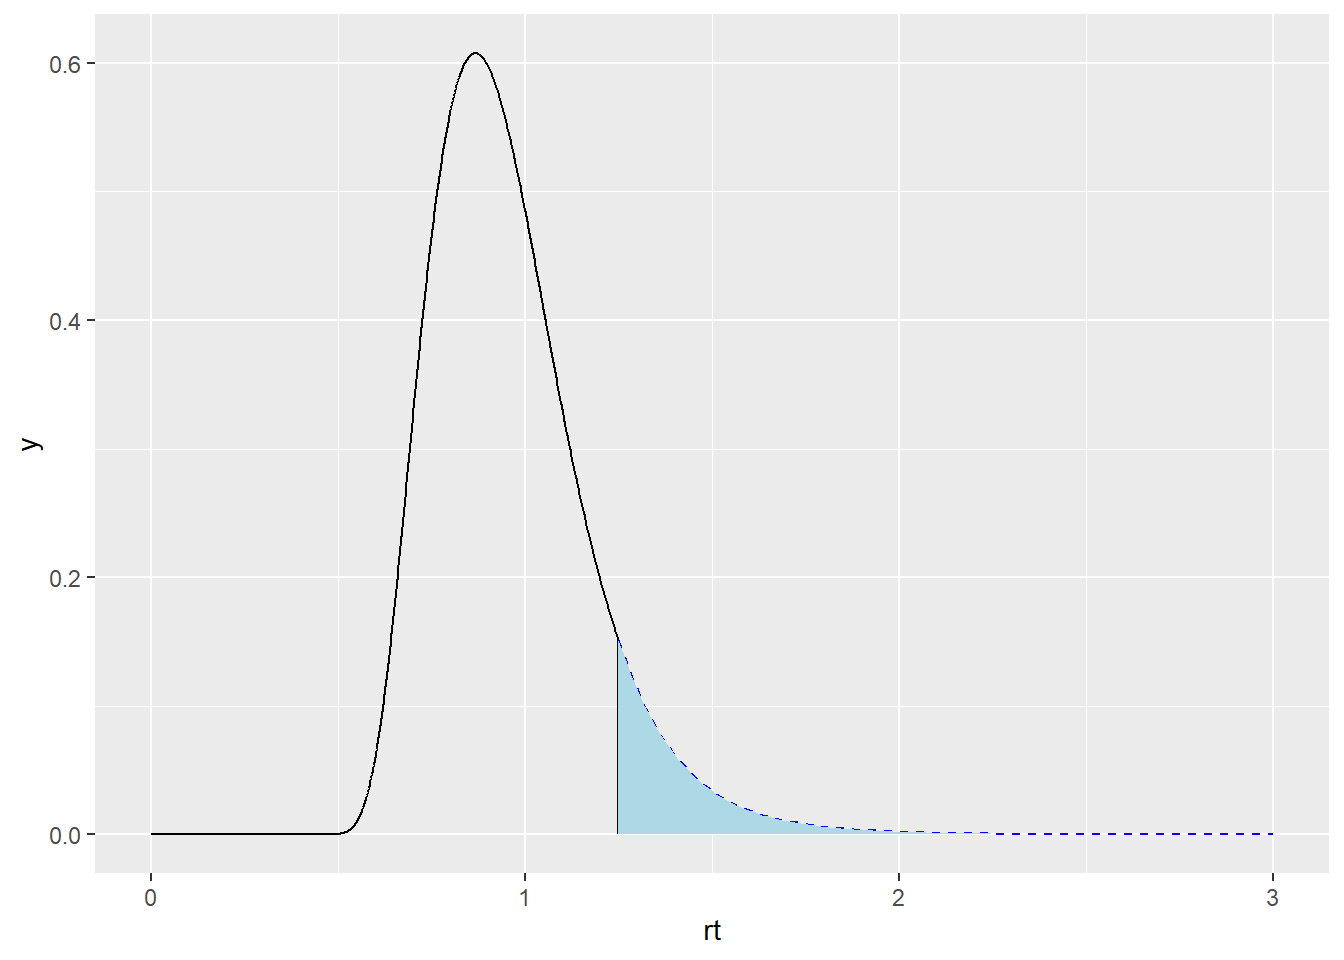

In [ ]:
truncdLBA <- function(rt, ..., LT = 0, UT = Inf) {
  ifelse(rt < LT | rt > UT, 0, dLBA(rt, ...))
}

LT = 0
UT = 1.25

ggplot(data.frame(rt = seq(0, 3, length.out = 1000)), aes(rt)) +
  stat_function(fun = truncdLBA,
                args = list(response = 1, A=2, b= 4, t0 = .2, mean_v=c(3,4), sd_v=c(1,1), LT = LT, UT = UT),
                xlim = c(0, UT+0.0001),
                n = 1001) +
  stat_function(fun = dLBA,
                args = list(response = 1, A=2, b=4, t0 = .2, mean_v=c(3,4), sd_v=c(1,1)),
                xlim = c(UT, 3),
                color = "blue",
                linetype = "dashed")+
  stat_function(fun = dLBA,
                args = list(response = 1, A=2, b=4, t0 = .2, mean_v=c(3,4), sd_v=c(1,1)),
                xlim = c(UT, 3),
                geom = "area",
                fill = "lightblue")

# Simulation Study 1: Upper Censoring

## Methods

The first simulation compared upper censoring and truncation for a single fit (N = 1) with a large number of trials (T = 1000). A simple model, with two stimuli and two racers, was used (see @tablesomething for an overview of the parameter values). Censoring and truncation were compared at three different levels, with cutoffs of 2.5%, 10%, and 30% upper RTs missing. Responses were not missing for any of the censored values. For each model $\times$ missing level, new data was simulated, but were kept the same between censoring and truncation to ensure differences would not be due to random sampling error. parameters

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: center;"><div width="100.0%" data-layout-align="center">
<table>
<thead>
<tr>
<th>B</th>
<th>v</th>
<th>v_lMd</th>
<th>A</th>
<th>sv_lMd</th>
<th>t0</th>
</tr>
</thead>
<tbody>
<tr>
<td>2</td>
<td>3</td>
<td>1</td>
<td>2</td>
<td>0.75</td>
<td>0.2</td>
</tr>
</tbody>
</table>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: center;"><div width="100.0%" data-layout-align="center">
<table>
<thead>
<tr>
<th>B</th>
<th>v</th>
<th>v_lMd</th>
<th>s_lMd</th>
<th>t0</th>
</tr>
</thead>
<tbody>
<tr>
<td>3</td>
<td>1</td>
<td>4</td>
<td>.75</td>
<td>.2</td>
</tr>
</tbody>
</table>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: center;"><div width="100.0%" data-layout-align="center">
<table>
<thead>
<tr>
<th>m</th>
<th>m_lMd</th>
<th>s</th>
<th>s_lMd</th>
<th>t0</th>
</tr>
</thead>
<tbody>
<tr>
<td>.75</td>
<td>.65</td>
<td>.5</td>
<td>.8</td>
<td>.4</td>
</tr>
</tbody>
</table>
</div></td>
</tr>
</tbody>
</table>

Simulation Parameters

## Results

Root mean square errors (RMSE) of the difference between all true simulated parameters and all medians of the sampled parameters were computed for each model.

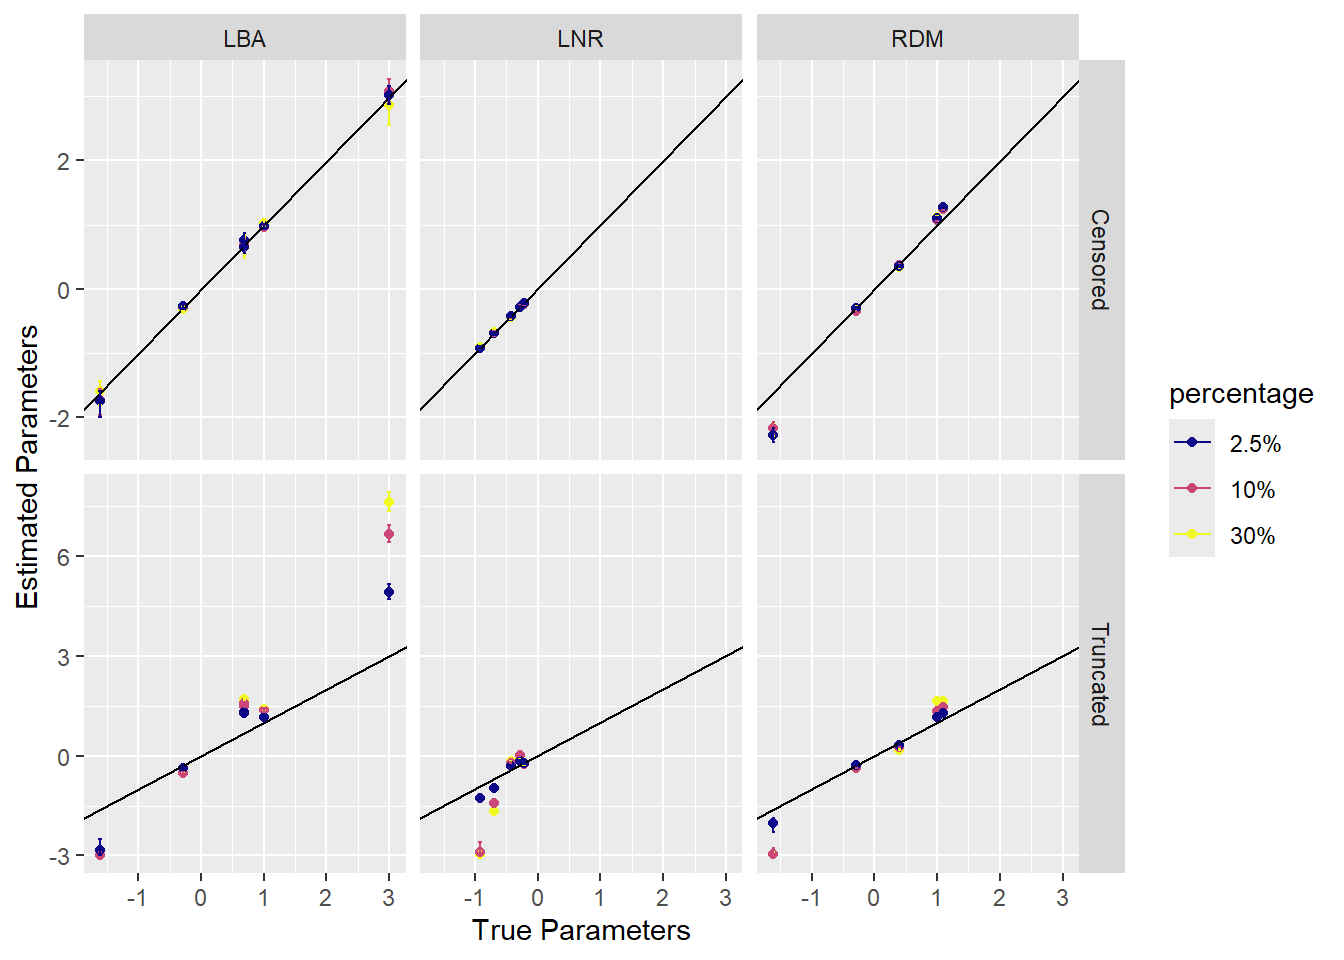

In [ ]:
parameters_CI_upper %>%
  ggplot(aes(true_parameter, `50%`, color = percentage)) +
  geom_point() +
  geom_abline() +
  geom_errorbar(aes(ymin = `2.5%`, ymax = `97.5%`)) +
  scale_color_viridis_d(option = "plasma") +
  facet_grid(censored ~ model_name, scales = "free_y") +
  # scale_color_brewer(palette = "YlOrRd") +
  ylab("Estimated Parameters") +
  xlab("True Parameters")

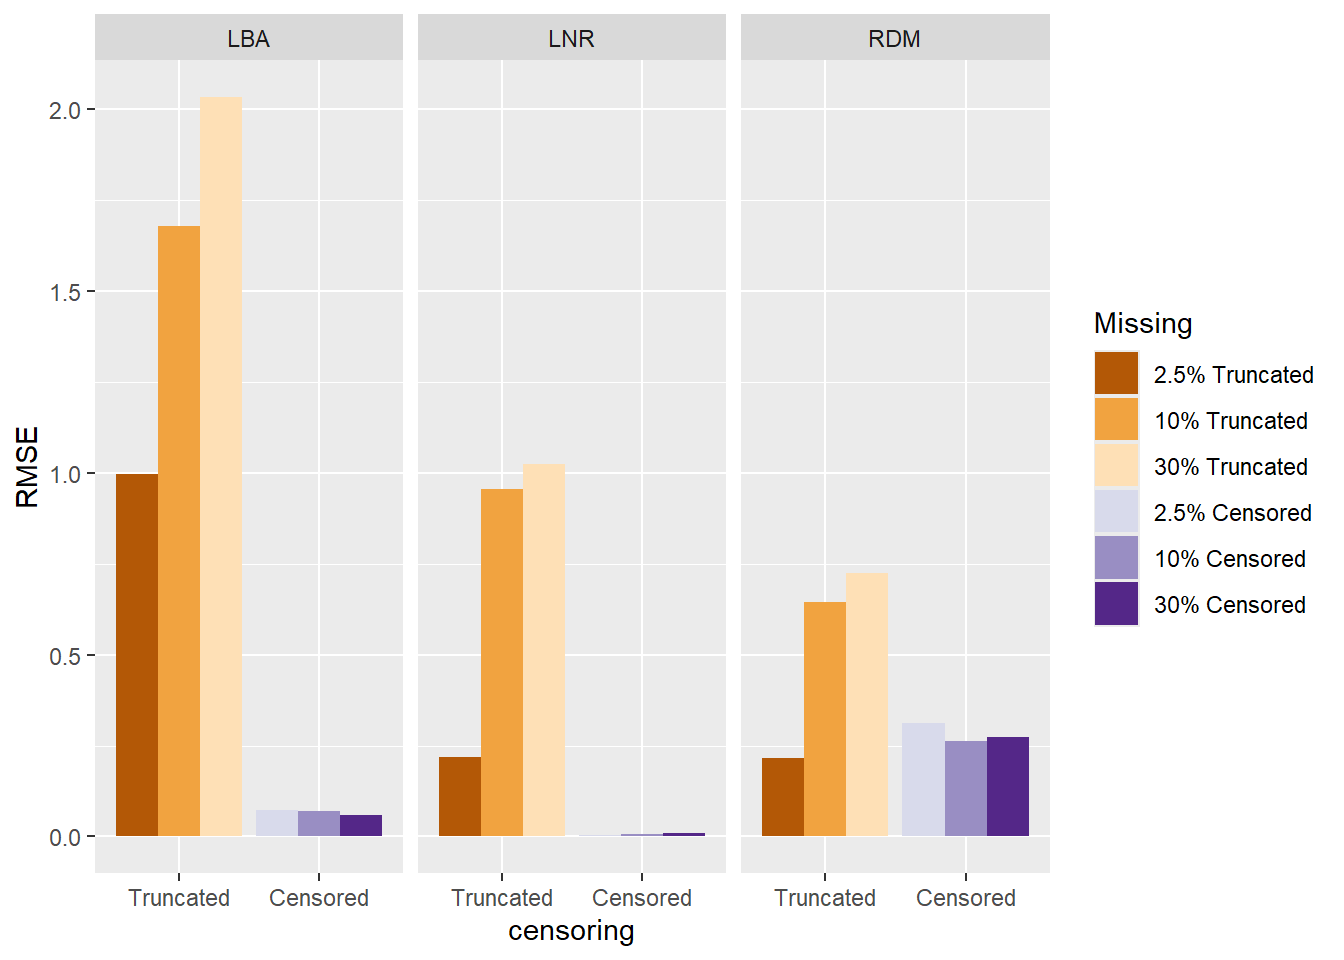

In [ ]:
EMCs_upper %>%
  ggplot(aes(censoring, RMSE, fill = interaction(percentage, censoring, sep = " "))) +
  facet_grid( ~ model_name) +
  scale_fill_brewer(palette = "PuOr") +
  geom_bar(position = "dodge", stat = "identity") +
  labs(fill = "Missing")

# Simulation Study 2:

## Methods

## Results

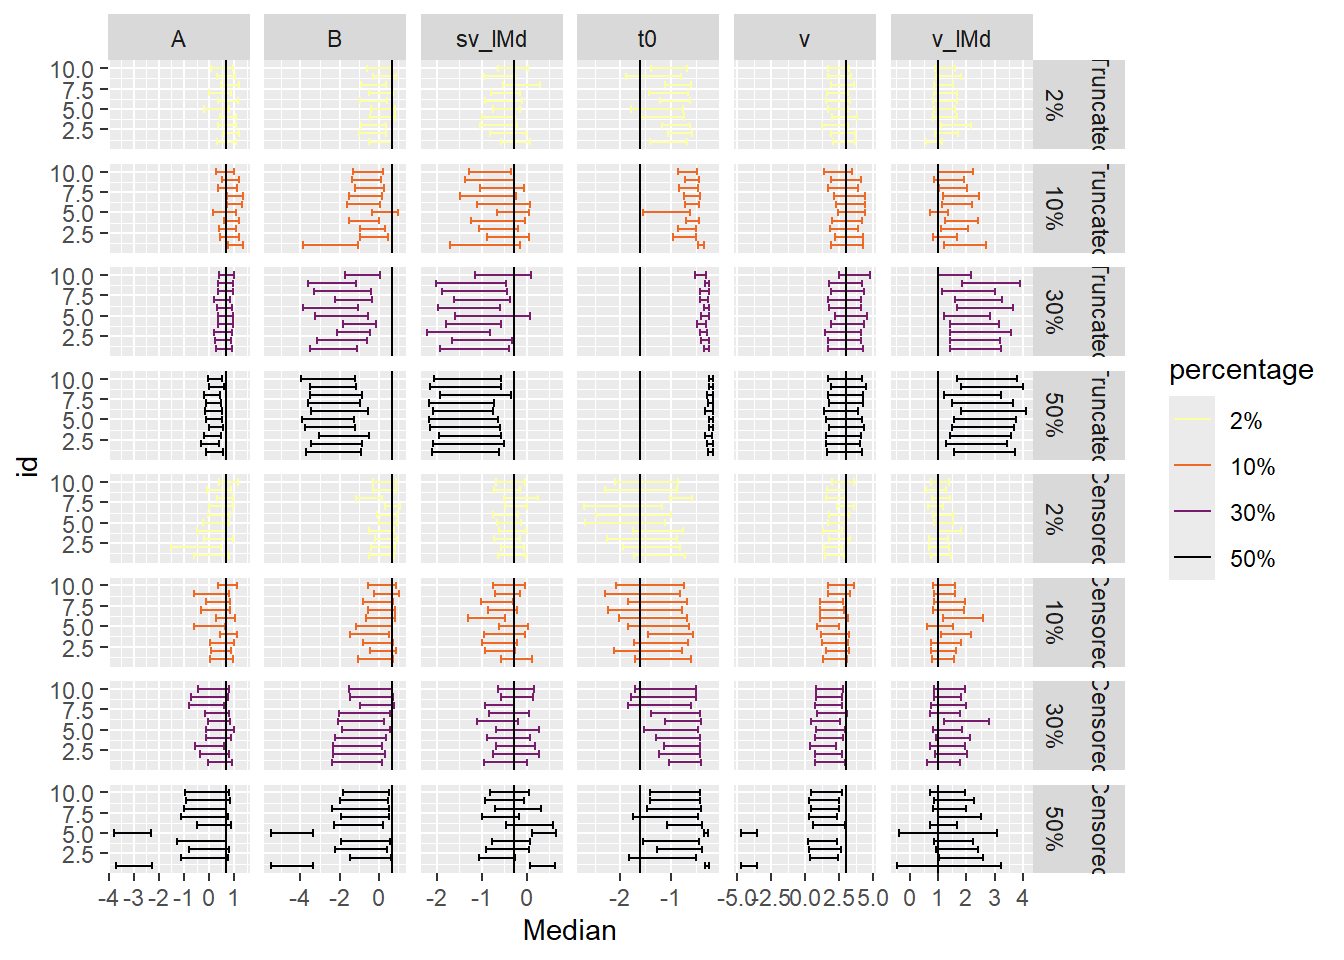

In [ ]:
pars_EMCs_both %>%
  filter(model_name == "LBA" & tail == "both" & response_known == "known") %>%
  ggplot(aes(Median, id, color = percentage)) +
  scale_color_viridis_d(option = "B", direction = -1) +
  facet_grid(censoring + percentage ~ variable, scales = "free_x") +
  geom_errorbarh(aes(xmin = Q2.5, xmax = Q97.5)) +
  geom_vline(aes(xintercept = true_parameter))

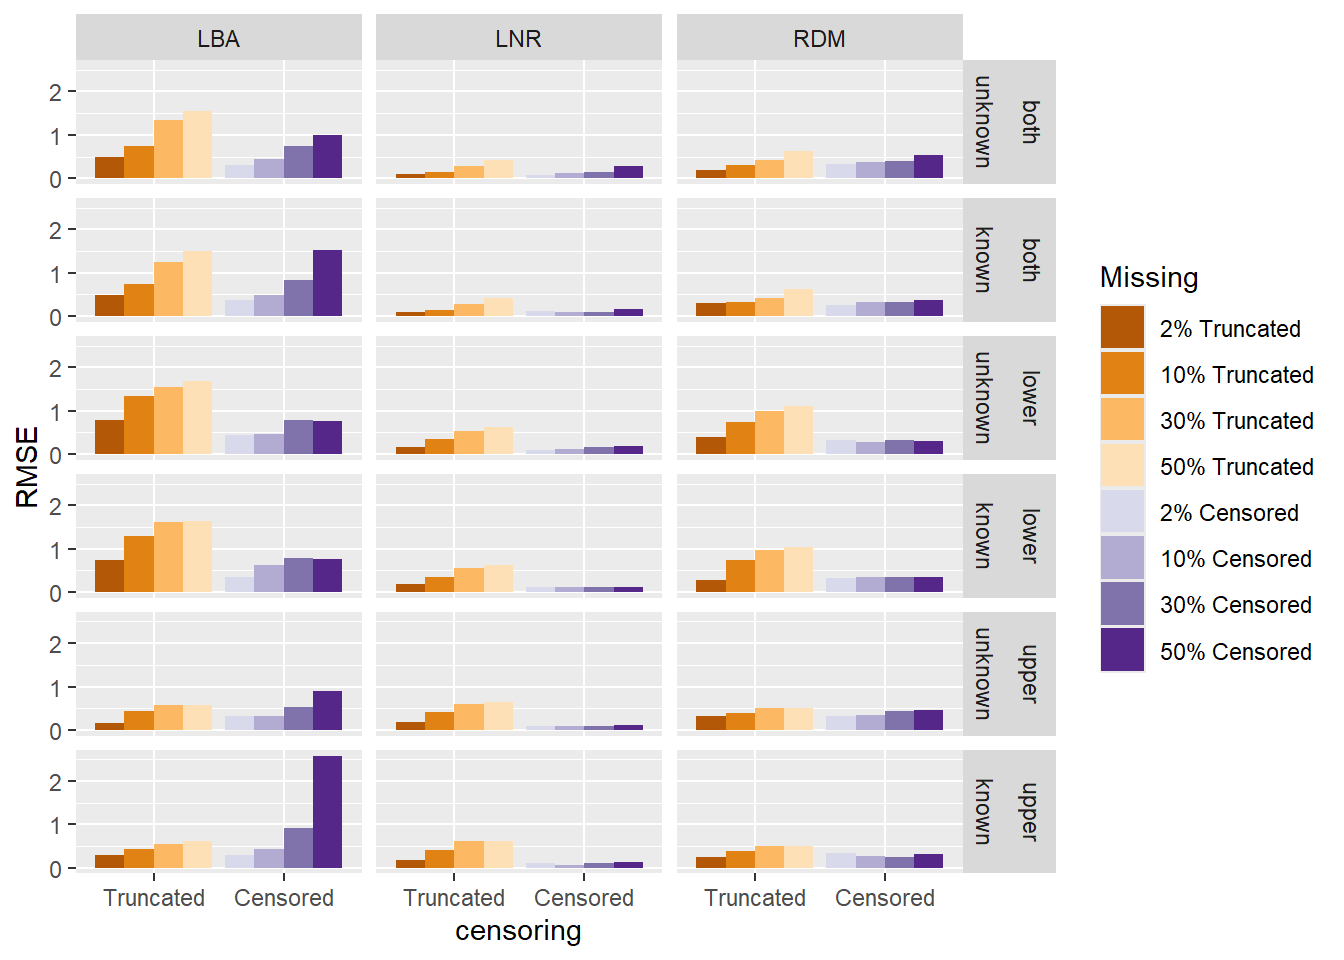

In [ ]:
EMCs_both_RMSEs %>%
  ggplot(aes(censoring, RMSE, fill = interaction(percentage, censoring, sep = " "))) +
  facet_grid(tail + response_known ~ model_name) +
  scale_fill_brewer(palette = "PuOr") +
  stat_summary(position = "dodge", geom = "bar", fun = "mean") +
  labs(fill = "Missing")

# Discussion